In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.models import Sequential, Model
from keras.layers import Activation, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [16]:
train_file = '/Users/harshjhunjhunwala/Desktop/github/facial_keypoint/data/training.csv'
test_file = '/Users/harshjhunjhunwala/Desktop/github/facial_keypoint/data/test.csv'
lookup_file = '/Users/harshjhunjhunwala/Desktop/github/facial_keypoint/data/IdLookupTable.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
lookup = pd.read_csv(lookup_file)

In [17]:
train.isnull().any().value_counts()
train.fillna(method = 'ffill',inplace = True)

In [18]:
image_list = []
for i in range(0,7049):
    img = train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    image_list.append(img)

In [19]:
image_list = np.array(image_list,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

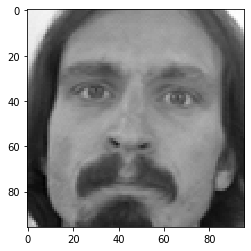

In [20]:
plt.imshow(image_list[0].reshape(96,96 ),cmap='gray')
plt.show()

In [25]:
keypoint_data = train.drop('Image', axis=1)
fac_points = []
for i in range(len(keypoint_data)):
    fac_points.append(keypoint_data.iloc[i])
y_train = fac_points

fac_points = np.array(fac_points, dtype='float')
y_train = np.array(y_train, dtype="float")


In [26]:
###Visualising facial keypoints

# x and y coords are alternating so I'll try to add a scatter plot with the x&y lists as alternating values 
len(fac_points[0])

30

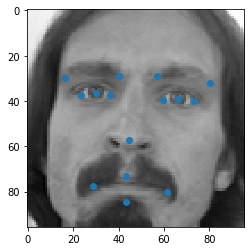

In [27]:
plt.imshow(image_list[0].reshape(96,96 ),cmap='gray')
plt.scatter(fac_points[0][0::2], fac_points[0][1::2])
plt.show()

In [ ]:
# Training the Model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(30))
model.summary()

# model1 stats -> acc 68; loss 80

In [29]:
# Training the Model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(30))
model.summary()

# model2 stats -> acc 69; loss 69

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

In [30]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

In [31]:
model.fit(X_train,y_train,epochs = 5,batch_size = 32,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/5
5639/5639 [==============================] - 93s 16ms/step - loss: 409.7329 - acc: 0.5295 - val_loss: 109.2181 - val_acc: 0.6844
Epoch 2/5
5639/5639 [==============================] - 72s 13ms/step - loss: 93.9890 - acc: 0.6774 - val_loss: 97.1307 - val_acc: 0.6702
Epoch 3/5
5639/5639 [==============================] - 68s 12ms/step - loss: 87.7357 - acc: 0.6436 - val_loss: 76.1869 - val_acc: 0.6326
Epoch 4/5
5639/5639 [==============================] - 77s 14ms/step - loss: 75.5060 - acc: 0.6927 - val_loss: 75.3688 - val_acc: 0.6362
Epoch 5/5
5639/5639 [==============================] - 85s 15ms/step - loss: 69.9901 - acc: 0.6916 - val_loss: 94.6305 - val_acc: 0.6851
